In [90]:
import sqlite3
import pandas as pd
import numpy as np

In [5]:
file = '/Users/gunter/Documents/Masterschool/Kostya/files/Data_Home_assignment_data_anlayst.xlsx'

In [6]:
xls = pd.ExcelFile(file)

In [8]:
xls.sheet_names

['Users', 'Jobs', 'Candidacies']

In [9]:

# Schritt 2: Jede Tabelle in ein DataFrame laden
users_df = pd.read_excel(xls, sheet_name='Users')
jobs_df = pd.read_excel(xls, sheet_name='Jobs')
candidacies_df = pd.read_excel(xls, sheet_name='Candidacies')


In [10]:

# Schritt 3: SQLite-Datenbank erstellen
conn = sqlite3.connect('facebook_inner_mobility.db')


In [11]:

# Schritt 4: DataFrames in SQL-Tabellen schreiben
users_df.to_sql('Users', conn, if_exists='replace', index=False)
jobs_df.to_sql('Jobs', conn, if_exists='replace', index=False)
candidacies_df.to_sql('Candidacies', conn, if_exists='replace', index=False)

print("Excel-Daten wurden erfolgreich in die SQLite-Datenbank importiert.")


Excel-Daten wurden erfolgreich in die SQLite-Datenbank importiert.


In [15]:
users_df.columns

Index(['User_id', 'Department', 'IS_registered?', 'Registration_date',
       'Profile_completness'],
      dtype='object')

In [12]:

# Schritt 5: SQL-Abfragen ausführen
cursor = conn.cursor()


copied to second version

In [65]:

# Beispiel-Abfrage 1: Anzahl der Registrierungen pro Abteilung
query1 = """
SELECT Department, COUNT(*) AS Number_of_Registrations
FROM Users
WHERE [IS_registered?] = 1
GROUP BY Department;
"""
cursor.execute(query1)


In [66]:
cursor.fetchall

<function Cursor.fetchall()>

In [67]:

print("Anzahl der Registrierungen pro Abteilung: ONLY ONCE CALLABLE")
for row in cursor.fetchall():
    print(row)


Anzahl der Registrierungen pro Abteilung: ONLY ONCE CALLABLE
('Asia', 497)
('Israel', 716)
('LAR', 5084)
('NAR', 1464)


In [60]:

# Beispiel-Abfrage 2: Umwandlungsrate pro Abteilung
query2 = """
SELECT Department, 
       (SUM(CASE WHEN Action = 'Assignment' THEN 1.0 ELSE 0.0 END) / 
        SUM(CASE WHEN Action = 'Suggestion' THEN 1.0 ELSE 0.0 END)) * 100.0 AS Conversion_Rate,
        (SUM(CASE WHEN Action = 'Assignment' THEN 1.0 ELSE 0.0 END) / 
        SUM(CASE WHEN Action = 'User_liked' THEN 1.0 ELSE 0.0 END)) * 100.0 AS Liked_Rate
FROM Candidacies AS c
JOIN Users AS u ON c.User_id = u.User_id
GROUP BY Department;
"""
cursor.execute(query2)
print("Umwandlungsrate pro Abteilung:")
for row in cursor.fetchall():
    print(row)


Umwandlungsrate pro Abteilung:
('Asia', 13.013698630136986, 40.714285714285715)
('Israel', 15.193370165745856, 62.5)
('LAR', 8.214096449390567, 40.469973890339425)
('NAR', 7.341269841269842, 43.02325581395349)


In [63]:
# Beispiel-Abfrage 3: Profile completeness
query3 = """
SELECT Department, 
       AVG(Profile_completness) as average_cpmpletenes
FROM Candidacies AS c
JOIN Users AS u ON c.User_id = u.User_id
GROUP BY Department;
"""
cursor.execute(query3)
print("Profile completeness pro Abteilung: 1-4")
for row in cursor.fetchall():
    print(row)

Profile completeness pro Abteilung: 1-4
('Asia', 3.7496062992125982)
('Israel', 3.8099009900990097)
('LAR', 3.756907216494845)
('NAR', 3.5279106858054226)


In [74]:
# Beispiel-Abfrage 4: number of jobs per user and after wards average per Region
query4 = """
SELECT Department, 
       COUNT(DISTINCT Job_id) as jobs_per,
       COUNT(DISTINCT u.User_id) as users_per,
       (COUNT(DISTINCT u.User_id)*1.0/COUNT(DISTINCT Job_id))*1.0 as fraction_user_jobs
FROM Candidacies AS c
JOIN Users AS u ON c.User_id = u.User_id
GROUP BY Department;
"""
cursor.execute(query4)
print("Profile completeness pro Abteilung: 1-4")
for row in cursor.fetchall():
    print(row)

Profile completeness pro Abteilung: 1-4
('Asia', 149, 126, 0.8456375838926175)
('Israel', 147, 103, 0.7006802721088435)
('LAR', 536, 567, 1.0578358208955223)
('NAR', 225, 171, 0.76)


In [80]:
# Example 5: Relative Registration per departement
query5 = """
SELECT Department, COUNT(*) AS Number_of_Registrations,
SUM([IS_registered?])*1.0/COUNT([IS_registered?]) as fraction_registered
FROM Users
GROUP BY Department;
"""
cursor.execute(query5)
print("Profile completeness pro Abteilung: 1-4")
for row in cursor.fetchall():
    print(row)

Profile completeness pro Abteilung: 1-4
('Asia', 513, 0.9688109161793372)
('Israel', 747, 0.9585006693440429)
('LAR', 5230, 0.9720841300191204)
('NAR', 1510, 0.9695364238410596)


In [ ]:

# Verbindung schließen
conn.close()

plot the time variable: 

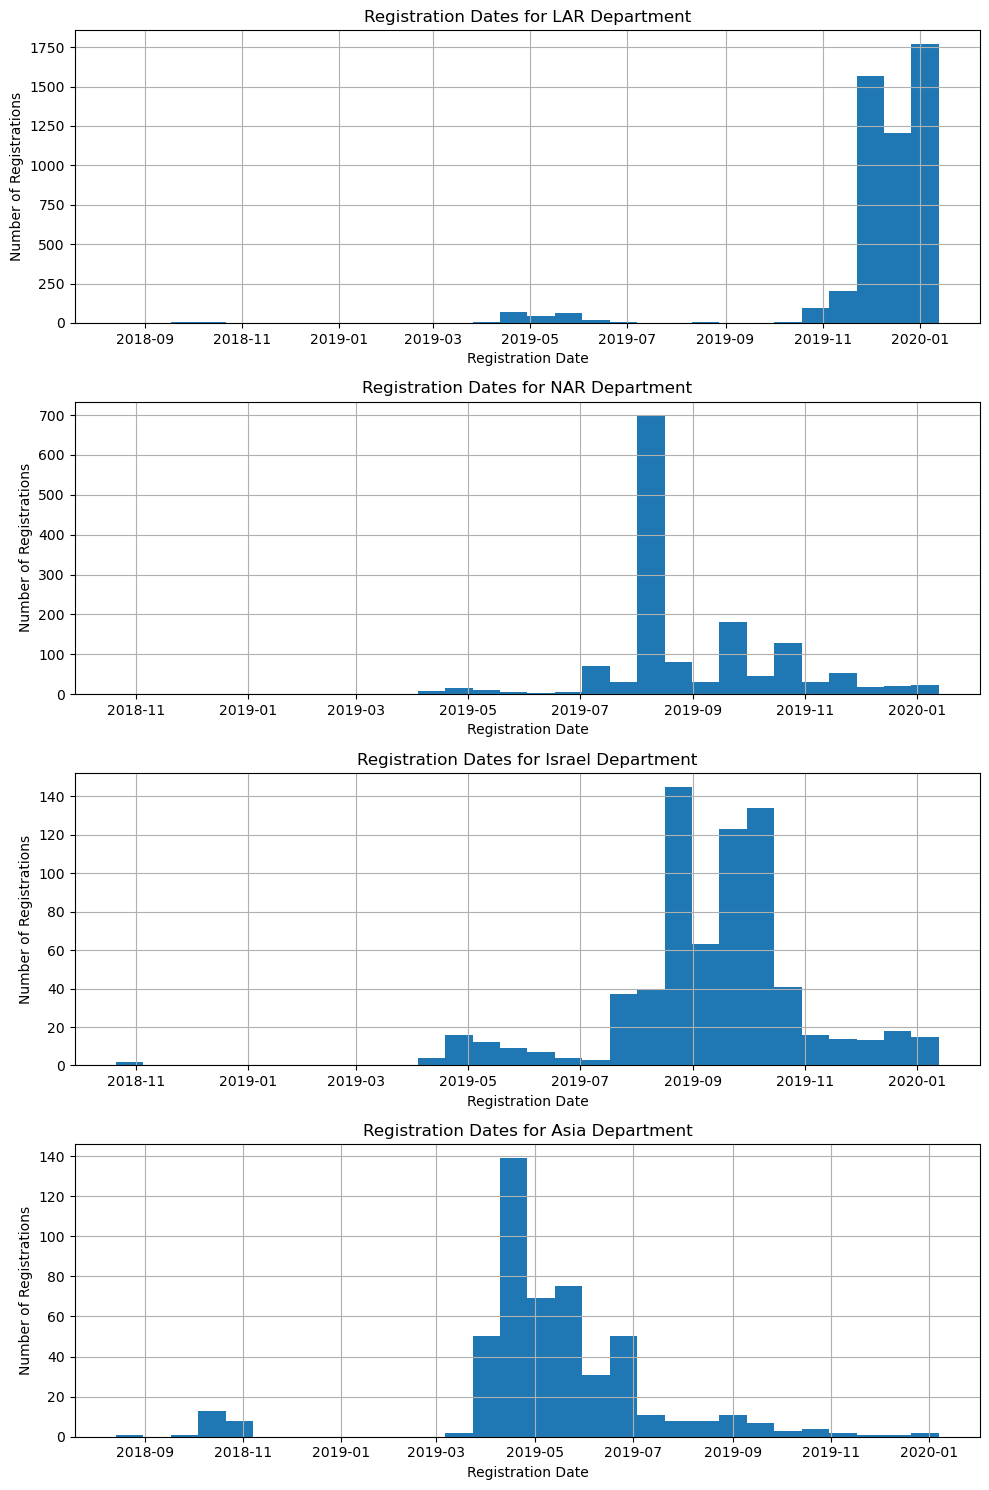

In [81]:
import matplotlib.pyplot as plt

# Convert registration date to datetime format
users_df['Registration_date'] = pd.to_datetime(users_df['Registration_date'])

# Plotting the registration dates for each department
departments = users_df['Department'].unique()
fig, axs = plt.subplots(len(departments), 1, figsize=(10, 15))

for i, dept in enumerate(departments):
    dept_users = users_df[users_df['Department'] == dept]
    dept_users['Registration_date'].hist(ax=axs[i], bins=30)
    axs[i].set_title(f'Registration Dates for {dept} Department')
    axs[i].set_xlabel('Registration Date')
    axs[i].set_ylabel('Number of Registrations')

plt.tight_layout()
plt.show()


In [85]:
dept_users = users_df[users_df['Department'] == 'Israel']
dept_users

,User_id,Department,IS_registered?,Registration_date,Profile_completness
29,10393993,Israel,0,NaT,NaN
30,10393996,Israel,1,2019-11-12,4.0
31,10394005,Israel,0,NaT,NaN
32,10394032,Israel,0,NaT,NaN
36,10394043,Israel,1,2019-09-17,1.0
...,...,...,...,...,...
6408,10406862,Israel,1,2020-01-08,1.0
6439,10406912,Israel,1,2020-01-09,NaN
6441,10406917,Israel,1,2020-01-09,1.0
6442,10406920,Israel,1,2020-01-09,NaN


In [91]:


# Load the data
# file_path = 'Data - Home assignment data anlayst.xlsx'
# users_df = pd.read_excel(file_path, sheet_name='Users')

# Convert the 'Registration_date' column to datetime format
users_df['Registration_date'] = pd.to_datetime(users_df['Registration_date'])

def calculate_mode_bin_average(users_df, num_bins=None, bin_intervals=None):
    departments = users_df['Department'].unique()
    mode_bin_averages = {}

    for dept in departments:
        dept_users = users_df[users_df['Department'] == dept]
        dates = dept_users['Registration_date']
        
        # Define bins
        if bin_intervals:
            bins = pd.date_range(start=dates.min(), end=dates.max(), freq=bin_intervals)
        else:
            bins = np.linspace(dates.min().value, dates.max().value, num_bins + 1)
            bins = pd.to_datetime(bins)

        # Generate histogram
        hist, bin_edges = np.histogram(dates, bins=bins)

        # Find the mode bin
        mode_bin_index = np.argmax(hist)
        mode_bin_start = bin_edges[mode_bin_index]
        mode_bin_end = bin_edges[mode_bin_index + 1]

        # Calculate the average date of the mode bin
        mode_bin_dates = dates[(dates >= mode_bin_start) & (dates < mode_bin_end)]
        average_date = mode_bin_dates.mean()

        mode_bin_averages[dept] = average_date

    return mode_bin_averages

# Example usage:
# Calculate mode bin averages with a given number of bins
num_bins = 10
mode_bin_averages = calculate_mode_bin_average(users_df, num_bins=num_bins)
print("Mode bin averages with given number of bins:")
for dept, avg_date in mode_bin_averages.items():
    print(f"Department: {dept}, Average Date: {avg_date}")

# Calculate mode bin averages with specific time intervals (e.g., 'M' for month)
bin_intervals = 'M'
mode_bin_averages_intervals = calculate_mode_bin_average(users_df, bin_intervals=bin_intervals)
print("\nMode bin averages with specific time intervals:")
for dept, avg_date in mode_bin_averages_intervals.items():
    print(f"Department: {dept}, Average Date: {avg_date}")



Mode bin averages with given number of bins:
Department: LAR, Average Date: 2019-12-22 06:48:08.928254976
Department: NAR, Average Date: 2019-08-08 07:23:53.785449984
Department: Israel, Average Date: 2019-09-22 16:25:30
Department: Asia, Average Date: 2019-04-15 12:56:32.670157056

Mode bin averages with specific time intervals:
Department: LAR, Average Date: 2019-12-11 19:43:24.654393856
Department: NAR, Average Date: 2019-08-08 18:05:28.934010368
Department: Israel, Average Date: 2019-09-14 12:54:11.612903168
Department: Asia, Average Date: 2019-04-16 17:44:02.364531968


In [97]:
# time taken between registration and job assignment
# Beispiel-Abfrage 6: Verstrichene Zeit pro departement
query6 = """
SELECT Department, 
    AVG(Time_taken - Registration_date)*1.0 as average_time
FROM Candidacies AS c
JOIN Users AS u ON c.User_id = u.User_id
WHERE [IS_registered?] = 1
GROUP BY Department;
"""
cursor.execute(query6)
print("Zeit pro Abteilung")
for row in cursor.fetchall():
    print(row)

Zeit pro Abteilung
('Asia', 0.11181102362204724)
('Israel', 0.06732673267326733)
('LAR', 0.16783505154639175)
('NAR', 0.05741626794258373)


In [ ]:
# Calculating KPIs for each department
from datetime import datetime

# Number of Registrations
num_registrations = users_df.groupby('Department').size().reset_index(name='Number_of_Registrations')

# Profile Completeness Score
profile_completeness = users_df.groupby('Department')['Profile_completeness'].mean().reset_index(name='Profile_Completeness_Score')

# Job Applications
job_applications = candidacies_df.merge(users_df, on='User_id').groupby('Department').size().reset_index(name='Job_Applications')

# Conversion Rate
conversion_counts = candidacies_df.merge(users_df, on='User_id').pivot_table(index='Department', columns='Action', aggfunc='size', fill_value=0).reset_index()
conversion_counts['Conversion_Rate'] = (conversion_counts['Assignment'] / conversion_counts['Suggestion']) * 100

# Time to Conversion
candidacies_df['Time_taken'] = pd.to_datetime(candidacies_df['Time_taken'])
time_to_conversion = candidacies_df[candidacies_df['Action'] == 'Assignment'].merge(
    candidacies_df[candidacies_df['Action'] == 'Suggestion'], on=['User_id', 'Job_id'], suffixes=('_assign', '_suggest')
)
time_to_conversion['Time_Difference'] = (time_to_conversion['Time_taken_assign'] - time_to_conversion['Time_taken_suggest']).dt.days
avg_time_to_conversion = time_to_conversion.merge(users_df, on='User_id').groupby('Department')['Time_Difference'].mean().reset_index(name='Time_to_Conversion')

# Merging all KPIs into a single DataFrame
kpis = num_registrations.merge(profile_completeness, on='Department')
kpis = kpis.merge(job_applications, on='Department')
kpis = kpis.merge(conversion_counts[['Department', 'Conversion_Rate']], on='Department')
kpis = kpis.merge(avg_time_to_conversion, on='Department')

# Displaying the KPIs
import ace_tools as tools; tools.display_dataframe_to_user(name="KPIs by Department", dataframe=kpis)

kpis


In [98]:
# Correct the column name
profile_completeness = users_df.groupby('Department')['Profile_completness'].mean().reset_index(name='Profile_Completeness_Score')

# Recalculating KPIs with the corrected column name
kpis = num_registrations.merge(profile_completeness, on='Department')
kpis = kpis.merge(job_applications, on='Department')
kpis = kpis.merge(conversion_counts[['Department', 'Conversion_Rate']], on='Department')
kpis = kpis.merge(avg_time_to_conversion, on='Department')

# Displaying the KPIs
tools.display_dataframe_to_user(name="KPIs by Department", dataframe=kpis)

kpis


NameError: name 'num_registrations' is not defined

## second 

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the provided Excel file

file_path = '/mnt/data/Data_Home_assignment_data_anlayst.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Load dataframes
users_df = data['Users']
jobs_df = data['Jobs']
candidacies_df = data['Candidacies']

# Convert registration date to datetime format
users_df['Registration_date'] = pd.to_datetime(users_df['Registration_date'])

# Plotting the registration dates for each department to determine launch dates
departments = users_df['Department'].unique()
fig, axs = plt.subplots(len(departments), 1, figsize=(10, 15))

for i, dept in enumerate(departments):
    dept_users = users_df[users_df['Department'] == dept]
    dept_users['Registration_date'].hist(ax=axs[i], bins=30)
    axs[i].set_title(f'Registration Dates for {dept} Department')
    axs[i].set_xlabel('Registration Date')
    axs[i].set_ylabel('Number of Registrations')

plt.tight_layout()
plt.show()
```

### Determining Launch Dates

```python
# Group by Department and Registration_date to count registrations per day
registration_counts = users_df.groupby(['Department', 'Registration_date']).size().reset_index(name='Counts')

# Find the launch date as the date with the highest count in each department
launch_dates = registration_counts.loc[registration_counts.groupby('Department')['Counts'].idxmax()]

launch_dates
```

### KPIs Calculations

```python
# Number of Registrations
num_registrations = users_df.groupby('Department').size().reset_index(name='Number_of_Registrations')

# Profile Completeness Score
profile_completeness = users_df.groupby('Department')['Profile_completness'].mean().reset_index(name='Profile_Completeness_Score')

# Job Applications
job_applications = candidacies_df.merge(users_df, on='User_id').groupby('Department').size().reset_index(name='Job_Applications')

# Conversion Rate
conversion_counts = candidacies_df.merge(users_df, on='User_id').pivot_table(index='Department', columns='Action', aggfunc='size', fill_value=0).reset_index()
conversion_counts['Conversion_Rate'] = (conversion_counts['Assignment'] / conversion_counts['Suggestion']) * 100

# Time to Conversion
candidacies_df['Time_taken'] = pd.to_datetime(candidacies_df['Time_taken'])
time_to_conversion = candidacies_df[candidacies_df['Action'] == 'Assignment'].merge(
    candidacies_df[candidacies_df['Action'] == 'Suggestion'], on=['User_id', 'Job_id'], suffixes=('_assign', '_suggest')
)
time_to_conversion['Time_Difference'] = (time_to_conversion['Time_taken_assign'] - time_to_conversion['Time_taken_suggest']).dt.days
avg_time_to_conversion = time_to_conversion.merge(users_df, on='User_id').groupby('Department')['Time_Difference'].mean().reset_index(name='Time_to_Conversion')

# Merging all KPIs into a single DataFrame
kpis = num_registrations.merge(profile_completeness, on='Department')
kpis = kpis.merge(job_applications, on='Department')
kpis = kpis.merge(conversion_counts[['Department', 'Conversion_Rate']], on='Department')
kpis = kpis.merge(avg_time_to_conversion, on='Department')

kpis
```

### SQL Queries for KPIs

#### 1. Number of Registrations

```sql
SELECT Department, COUNT(*) AS Number_of_Registrations
FROM Users
WHERE IS_registered = 1
GROUP BY Department;
```

#### 2. Conversion Rate

```sql
SELECT Department, 
       (SUM(CASE WHEN Action = 'Assignment' THEN 1 ELSE 0 END) / 
        SUM(CASE WHEN Action = 'Suggestion' THEN 1 ELSE 0 END)) * 100 AS Conversion_Rate
FROM Candidacies AS c
JOIN Users AS u ON c.User_id = u.User_id
GROUP BY Department;
```

### Launch Score Formula

The formula for the "Launch Score" based on the 5 KPIs can be defined as:

\[ \text{Launch Score} = w_1 \times \text{Number of Registrations} + w_2 \times \text{Profile Completeness Score} + w_3 \times \text{Job Applications} + w_4 \times \text{Conversion Rate} - w_5 \times \text{Time to Conversion} \]

where \( w_1, w_2, w_3, w_4, w_5 \) are weights assigned to each KPI based on their importance.

### Evaluating Israel's Launch

To evaluate whether the Israel launch was less successful, we'll compute the Launch Score for each department and compare them.

```python
# Define weights for each KPI
weights = {
    'Number_of_Registrations': 0.2,
    'Profile_Completeness_Score': 0.2,
    'Job_Applications': 0.2,
    'Conversion_Rate': 0.3,
    'Time_to_Conversion': 0.1
}

# Calculate the Launch Score for each department
kpis['Launch_Score'] = (
    weights['Number_of_Registrations'] * kpis['Number_of_Registrations'] +
    weights['Profile_Completeness_Score'] * kpis['Profile_Completeness_Score'] +
    weights['Job_Applications'] * kpis['Job_Applications'] +
    weights['Conversion_Rate'] * kpis['Conversion_Rate'] -
    weights['Time_to_Conversion'] * kpis['Time_to_Conversion']
)

kpis[['Department', 'Launch_Score']]
```

### Graphs with Interesting Insights

## 1. **Bar chart of KPIs by Department**.
## 2. **Line chart showing the number of registrations over time for each department**.

```python
# Plotting the KPIs by Department
fig, ax = plt.subplots(figsize=(12, 6))
kpis.plot(kind='bar', x='Department', y=['Number_of_Registrations', 'Profile_Completeness_Score', 'Job_Applications', 'Conversion_Rate', 'Time_to_Conversion'], ax=ax)
ax.set_title('KPIs by Department')
ax.set_ylabel('Values')
plt.xticks(rotation=0)
plt.show()

# Plotting the number of registrations over time for each department
fig, ax = plt.subplots(figsize=(12, 6))
for dept in departments:
    dept_users = users_df[users_df['Department'] == dept]
    dept_users.groupby('Registration_date').size().cumsum().plot(ax=ax, label=dept)
ax.set_title('Cumulative Number of Registrations Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Number of Registrations')
ax.legend(title='Department')
plt.show()
```

# @title  hello new try

In [102]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [103]:

# Load the data from the provided Excel file

# file_path = '/mnt/data/Data_Home_assignment_data_anlayst.xlsx'
file_path = '/Users/gunter/Documents/Masterschool/Kostya/files/Data_Home_assignment_data_anlayst.xlsx'
data = pd.read_excel(file_path, sheet_name=None)


In [104]:

# Load dataframes
users_df = data['Users']
jobs_df = data['Jobs']
candidacies_df = data['Candidacies']


In [105]:

# Convert registration date to datetime format
users_df['Registration_date'] = pd.to_datetime(users_df['Registration_date'])


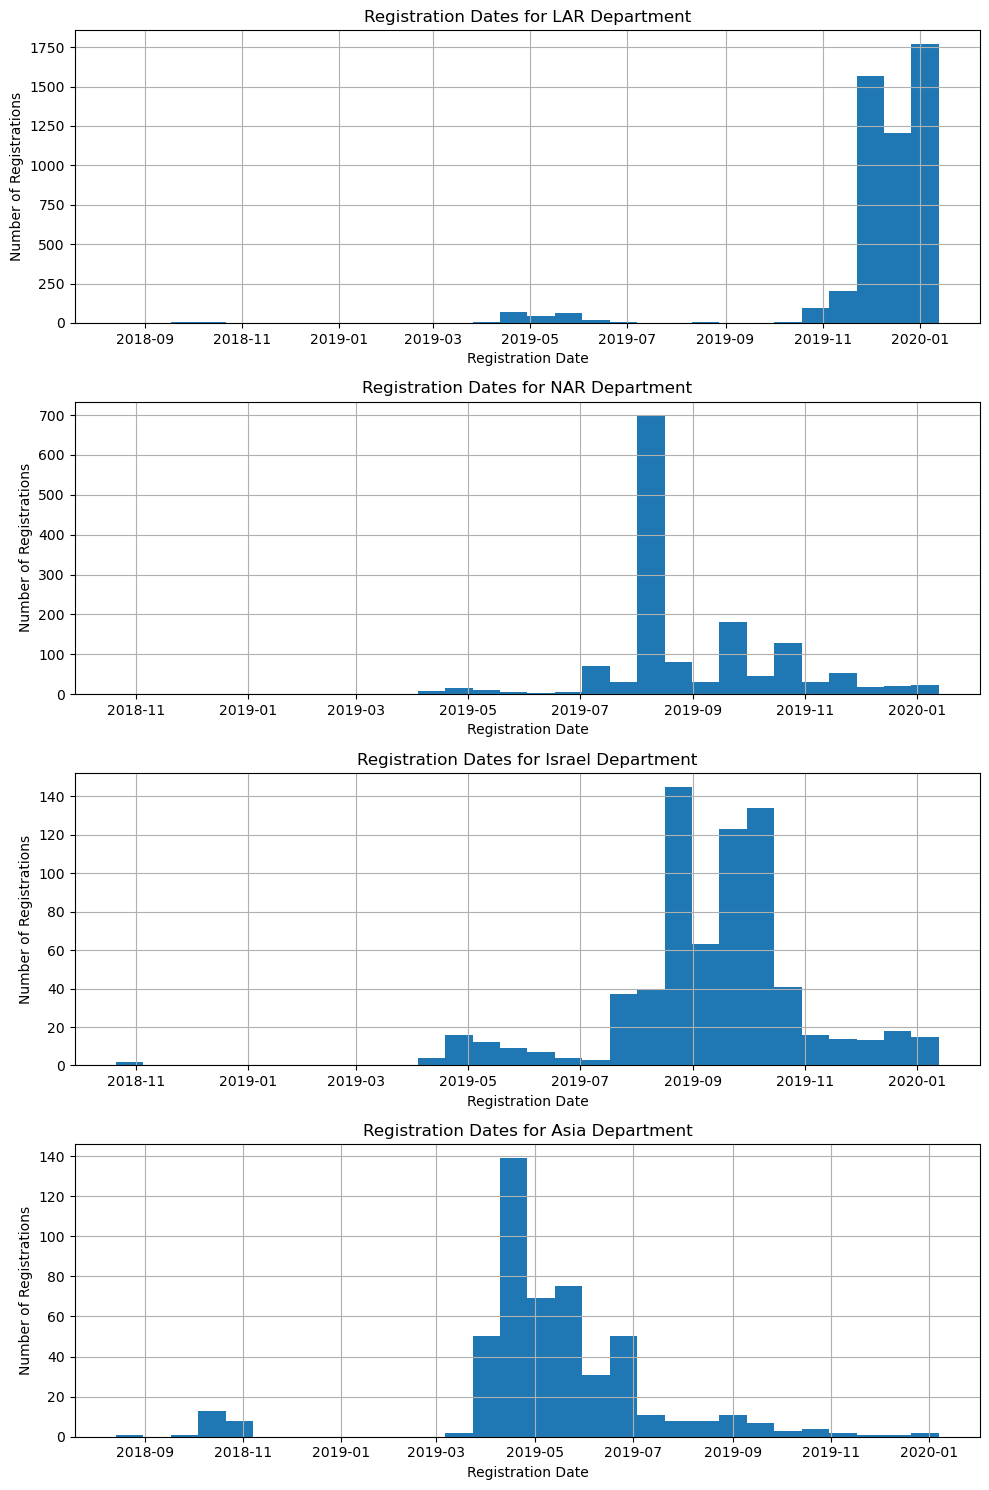

In [106]:

# Plotting the registration dates for each department to determine launch dates
departments = users_df['Department'].unique()
fig, axs = plt.subplots(len(departments), 1, figsize=(10, 15))

for i, dept in enumerate(departments):
    dept_users = users_df[users_df['Department'] == dept]
    dept_users['Registration_date'].hist(ax=axs[i], bins=30)
    axs[i].set_title(f'Registration Dates for {dept} Department')
    axs[i].set_xlabel('Registration Date')
    axs[i].set_ylabel('Number of Registrations')

plt.tight_layout()
plt.show()


In [107]:


### Determining Launch Dates

# Group by Department and Registration_date to count registrations per day
registration_counts = users_df.groupby(['Department', 'Registration_date']).size().reset_index(name='Counts')

# Find the launch date as the date with the highest count in each department
launch_dates = registration_counts.loc[registration_counts.groupby('Department')['Counts'].idxmax()]

launch_dates



,Department,Registration_date,Counts
25,Asia,2019-04-21,84
172,Israel,2019-08-19,102
357,LAR,2019-12-09,1229
433,NAR,2019-08-04,234


In [108]:

### KPIs Calculations


# Number of Registrations
num_registrations = users_df.groupby('Department').size().reset_index(name='Number_of_Registrations')

# Profile Completeness Score
profile_completeness = users_df.groupby('Department')['Profile_completness'].mean().reset_index(name='Profile_Completeness_Score')

# Job Applications
job_applications = candidacies_df.merge(users_df, on='User_id').groupby('Department').size().reset_index(name='Job_Applications')

# Conversion Rate
conversion_counts = candidacies_df.merge(users_df, on='User_id').pivot_table(index='Department', columns='Action', aggfunc='size', fill_value=0).reset_index()
conversion_counts['Conversion_Rate'] = (conversion_counts['Assignment'] / conversion_counts['Suggestion']) * 100

# Time to Conversion
candidacies_df['Time_taken'] = pd.to_datetime(candidacies_df['Time_taken'])
time_to_conversion = candidacies_df[candidacies_df['Action'] == 'Assignment'].merge(
    candidacies_df[candidacies_df['Action'] == 'Suggestion'], on=['User_id', 'Job_id'], suffixes=('_assign', '_suggest')
)

time_to_conversion['Time_Difference'] = (time_to_conversion['Time_taken_assign'] - time_to_conversion['Time_taken_suggest']).dt.days
avg_time_to_conversion = time_to_conversion.merge(users_df, on='User_id').groupby('Department')['Time_Difference'].mean().reset_index(name='Time_to_Conversion')

# Merging all KPIs into a single DataFrame
kpis = num_registrations.merge(profile_completeness, on='Department')
kpis = kpis.merge(job_applications, on='Department')
kpis = kpis.merge(conversion_counts[['Department', 'Conversion_Rate']], on='Department')
kpis = kpis.merge(avg_time_to_conversion, on='Department')

kpis


,Department,Number_of_Registrations,Profile_Completeness_Score,Job_Applications,Conversion_Rate,Time_to_Conversion
0,Asia,513,3.139066,635,13.013699,34.785047
1,Israel,747,2.395462,505,15.193370,38.767123
2,LAR,5230,2.631236,2425,8.214096,18.641434
3,NAR,1510,2.410768,627,7.341270,23.755102



### SQL Queries for KPIs

#### 1. Number of Registrations

```sql
SELECT Department, COUNT(*) AS Number_of_Registrations
FROM Users
WHERE IS_registered = 1
GROUP BY Department;
```

#### 2. Conversion Rate

```sql
SELECT Department, 
       (SUM(CASE WHEN Action = 'Assignment' THEN 1 ELSE 0 END) / 
        SUM(CASE WHEN Action = 'Suggestion' THEN 1 ELSE 0 END)) * 100 AS Conversion_Rate
FROM Candidacies AS c
JOIN Users AS u ON c.User_id = u.User_id
GROUP BY Department;
```

### Launch Score Formula

The formula for the "Launch Score" based on the 5 KPIs can be defined as:

\[ \text{Launch Score} = w_1 \times \text{Number of Registrations} + w_2 \times \text{Profile Completeness Score} + w_3 \times \text{Job Applications} + w_4 \times \text{Conversion Rate} - w_5 \times \text{Time to Conversion} \]

where \( w_1, w_2, w_3, w_4, w_5 \) are weights assigned to each KPI based on their importance.


In [109]:

### Evaluating Israel's Launch

# To evaluate whether the Israel launch was less successful, 
# we'll compute the Launch Score for each department and compare them.


# Define weights for each KPI
weights = {
    'Number_of_Registrations': 0.2,
    'Profile_Completeness_Score': 0.2,
    'Job_Applications': 0.2,
    'Conversion_Rate': 0.3,
    'Time_to_Conversion': 0.1
}


In [110]:

# Calculate the Launch Score for each department
kpis['Launch_Score'] = (
    weights['Number_of_Registrations'] * kpis['Number_of_Registrations'] +
    weights['Profile_Completeness_Score'] * kpis['Profile_Completeness_Score'] +
    weights['Job_Applications'] * kpis['Job_Applications'] +
    weights['Conversion_Rate'] * kpis['Conversion_Rate'] -
    weights['Time_to_Conversion'] * kpis['Time_to_Conversion']
)

kpis[['Department', 'Launch_Score']]


,Department,Launch_Score
0,Asia,230.653418
1,Israel,251.560391
2,LAR,1532.126333
3,NAR,427.709024


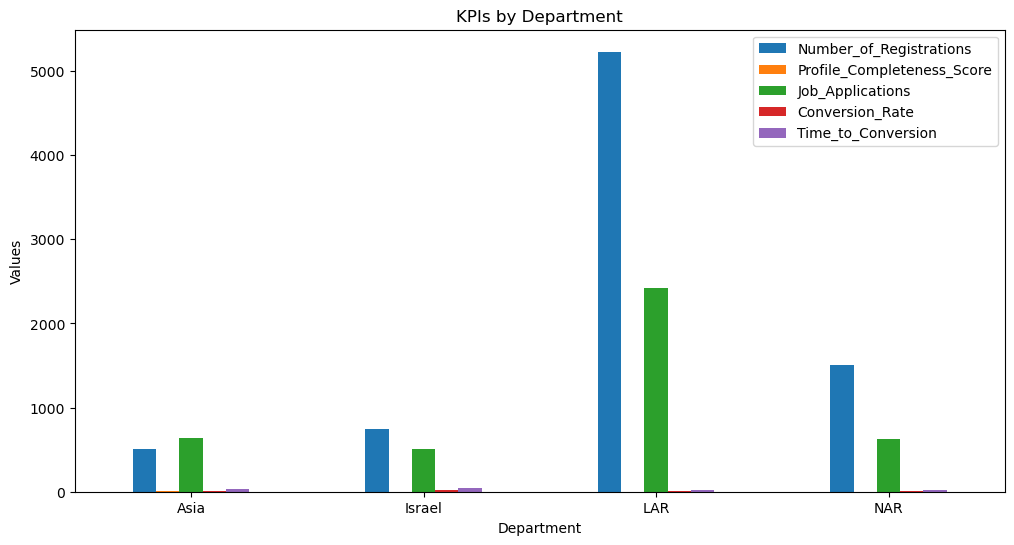

In [111]:

### Graphs with Interesting Insights

## 1. **Bar chart of KPIs by Department**.
## 2. **Line chart showing the number of registrations over time for each department**.


# Plotting the KPIs by Department
fig, ax = plt.subplots(figsize=(12, 6))
kpis.plot(kind='bar', x='Department', y=['Number_of_Registrations', 'Profile_Completeness_Score', 'Job_Applications', 'Conversion_Rate', 'Time_to_Conversion'], ax=ax)
ax.set_title('KPIs by Department')
ax.set_ylabel('Values')
plt.xticks(rotation=0)
plt.show()


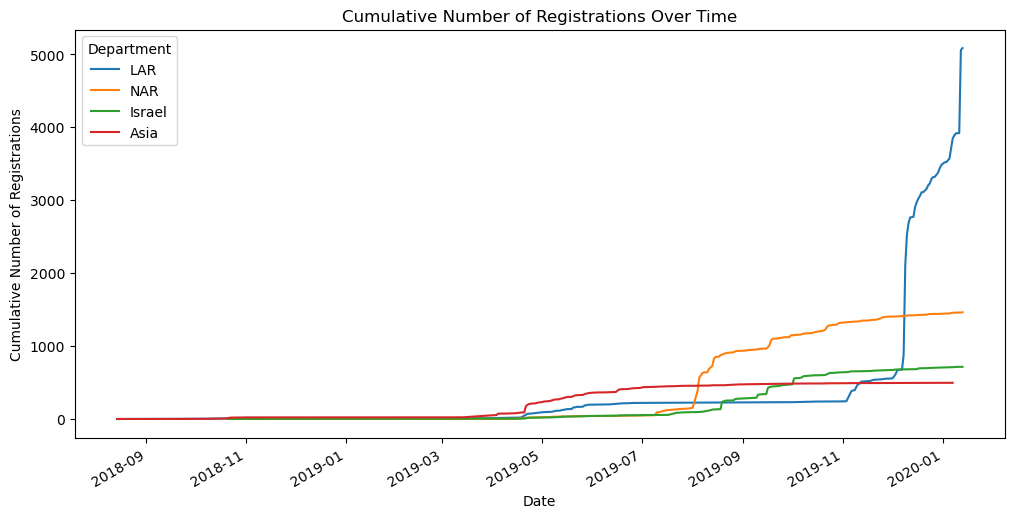

In [112]:

# Plotting the number of registrations over time for each department
fig, ax = plt.subplots(figsize=(12, 6))
for dept in departments:
    dept_users = users_df[users_df['Department'] == dept]
    dept_users.groupby('Registration_date').size().cumsum().plot(ax=ax, label=dept)
ax.set_title('Cumulative Number of Registrations')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Number of Registrations')
ax.legend(title='Department')
plt.show()
